# I. Slicing
---
For the images below, the x- and y-axis go across a slice of the body while the z-axis goes up and down the spine. The distance between pixels on the x- and y-axis is 703 μm, while the distance between pixels on the z-axis is 625 μm, so the z-axis should be stretched out to be approximately 12% longer. The length of the images in the x and y direction are around 360 mm long and about 148 mm in the z direction.

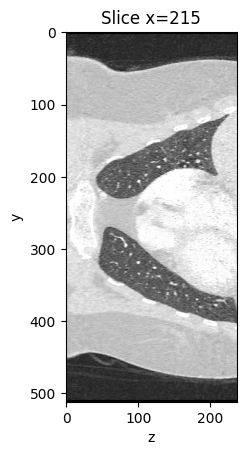

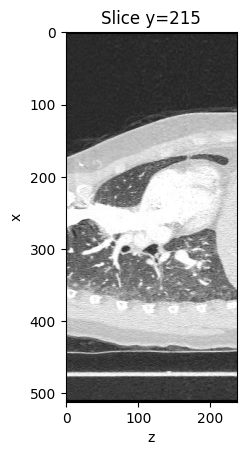

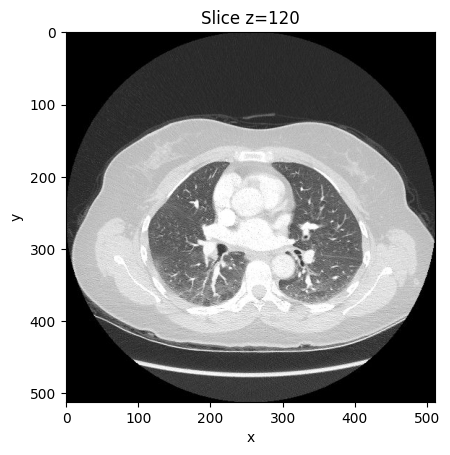

In [1]:
from main import *

img = generate_image()
display_slice(img, x=215)
display_slice(img, y=215)
display_slice(img, z=120)

# 2. Salt and pepper
---
Here is the image at y=215 with mean filtering. The filtered images have a clearly blurry appearance, especially with the kernel size of 5.

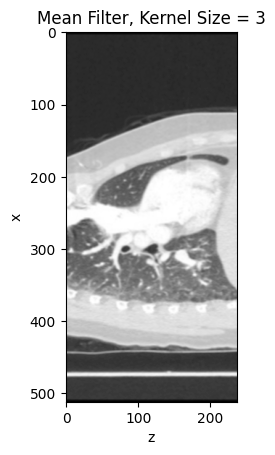

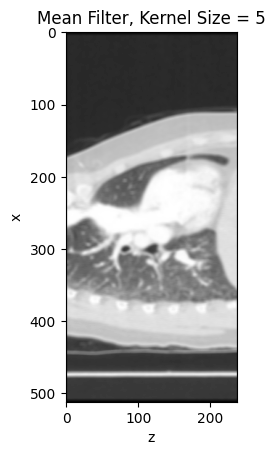

In [2]:
display_slice(mean_filter(img), y=215, title="Mean Filter, Kernel Size = 3")
display_slice(mean_filter(img, N=5), y=215, title="Mean Filter, Kernel Size = 5")

Below is the same image with median filtering instead. The edges are sharper than with the mean filtering, although there is less fine detail than with the mean filtering, especially with the kernel size of 5. 

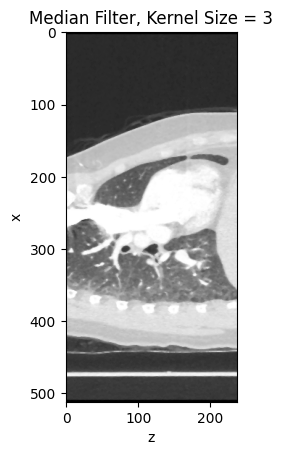

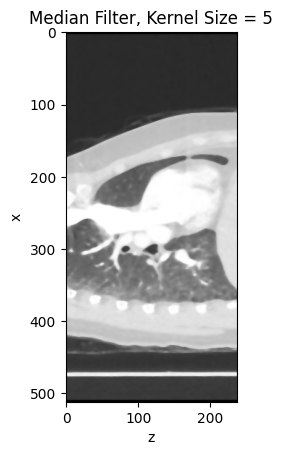

In [3]:
display_slice(medfilt(img), y=215, title="Median Filter, Kernel Size = 3")
display_slice(medfilt(img, kernel_size=5), y=215, title="Median Filter, Kernel Size = 5")

Below is the unfiltered image with artifically added salt and pepper noise.

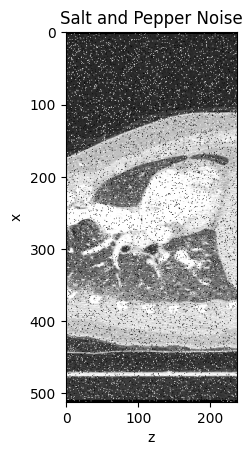

In [4]:
img_salt_and_pepper = add_salt_and_pepper(img)
display_slice(img_salt_and_pepper, y=215, title="Salt and Pepper Noise")

As seen below, the mean blurring makes the salt and pepper noise a little hazier, while the median filter completely removes it.

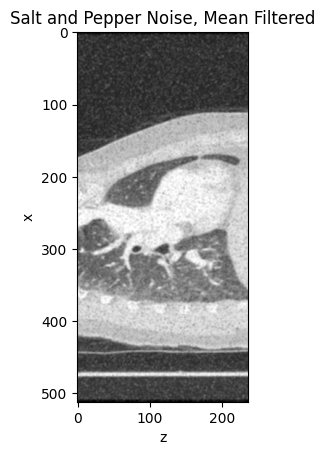

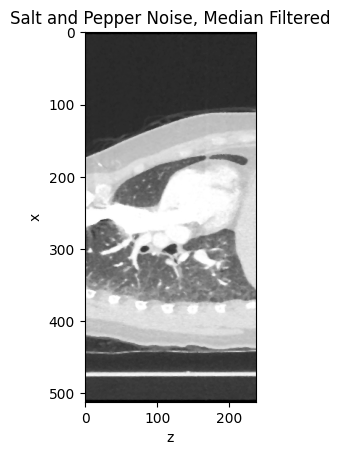

In [5]:
display_slice(mean_filter(img_salt_and_pepper), y=215, title="Salt and Pepper Noise, Mean Filtered")
display_slice(medfilt(img_salt_and_pepper), y=215, title="Salt and Pepper Noise, Median Filtered")

III. Gauss's wrath
---
Below are the images with gaussian noises of standard deviations of 0.1 and 0.5 added - note that the images are regularized to be between 0 and 1.

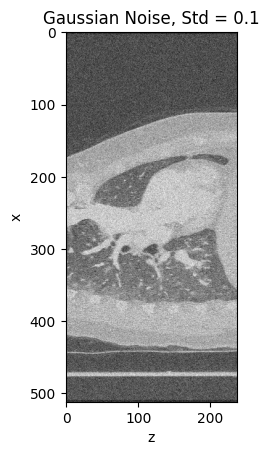

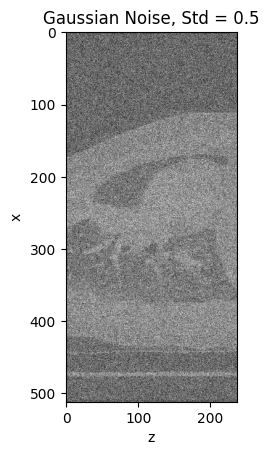

In [6]:
img_noise1 = add_gaussian_noise(img, 0.1)
img_noise2 = add_gaussian_noise(img, 0.5)

display_slice(img_noise1, y=215, title="Gaussian Noise, Std = 0.1")
display_slice(img_noise2, y=215, title="Gaussian Noise, Std = 0.5")

Below are those image with noise gaussian filtered with standard deviations of 0.7 and 1.1 respectively, which I feel have the best balance between reducing noise and retaining detail. Both values are within the same order of magnitude as the noise originally added.

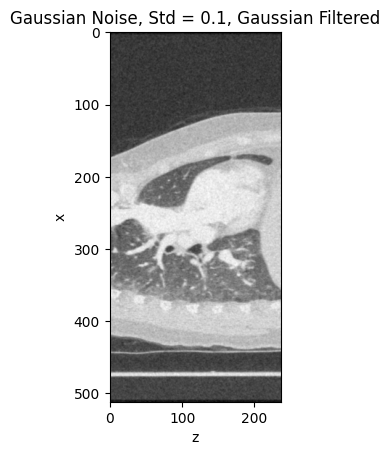

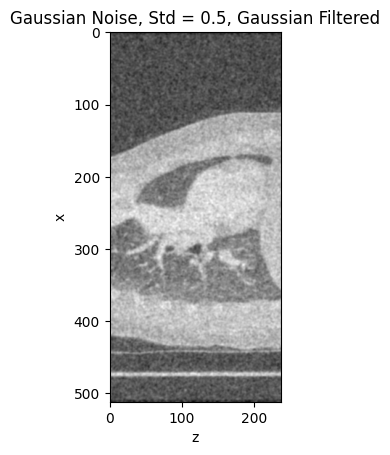

In [7]:
display_slice(gaussian_filter(img_noise1, 0.7), y=215, title="Gaussian Noise, Std = 0.1, Gaussian Filtered")
display_slice(gaussian_filter(img_noise2, 1.1), y=215, title="Gaussian Noise, Std = 0.5, Gaussian Filtered")

To blur the image, I converted the given $\delta_x$ and $\delta_z$ from their value in micrometers to pixels, then went from FWHM to standard deviation, and then inserted the values into the `gaussian_filter` function in SciPy, which applies the blur as a sequence of 1D convolutions. This blur loses a lot of both the fine details and edge definition relative to the original images.

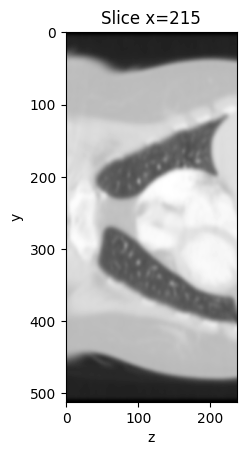

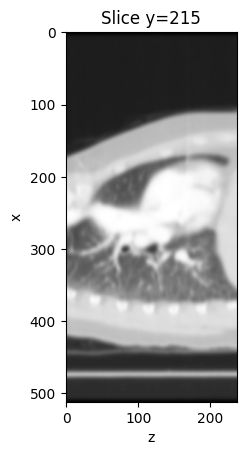

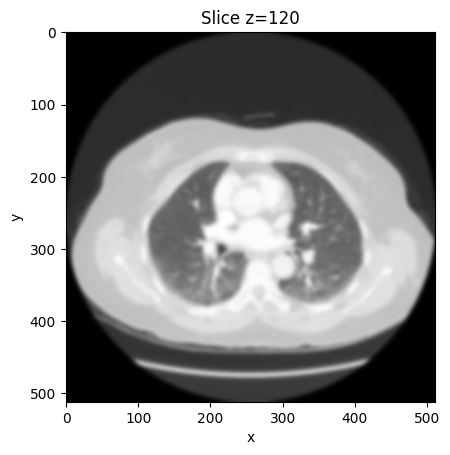

In [8]:
delta_x_μm, delta_z_μm = 2000, 1000
delta_x_pixels, delta_z_pixels = delta_x_μm / 703, delta_z_μm / 625
std_x, std_z = FWHM_to_std(delta_x_pixels), FWHM_to_std(delta_z_pixels)
img_gaussian_blur = gaussian_filter(img, sigma=[delta_x_pixels, delta_x_pixels, delta_z_pixels])

display_slice(img_gaussian_blur, x=215)
display_slice(img_gaussian_blur, y=215)
display_slice(img_gaussian_blur, z=120)

# IV: Foramina
---
This is the Canny edge detector used with the median-filtered image. The edges generated match what I would consider the important edges in the image.

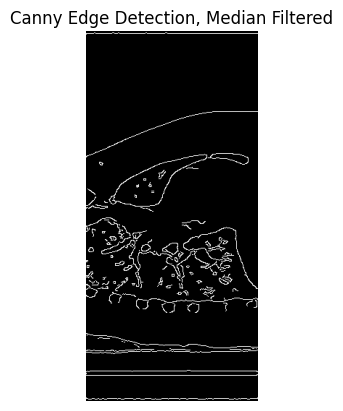

In [9]:
img_median_filter = medfilt(img)
display_canny(img_median_filter, y=215, title="Canny Edge Detection, Median Filtered")

The gaussian blur loses a lot of detail and edge definition, so many edges are left out of the Canny filter threshold.

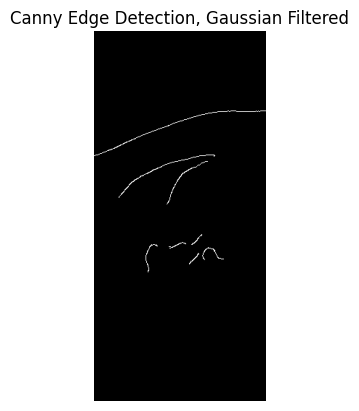

In [10]:
display_canny(img_gaussian_blur, y=215, title="Canny Edge Detection, Gaussian Filtered")

The gaussian noise, even with a relatively low noise level, creates large gradients within the image that the Canny filter is incapable of dealing with, making the output completely uninterpretable.

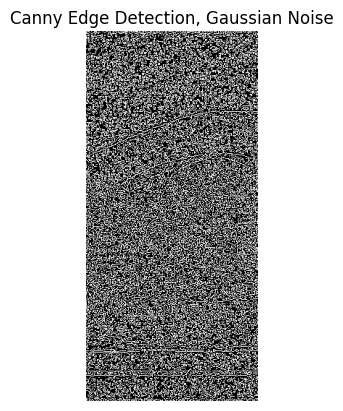

In [11]:
img_gaussian_noise = add_gaussian_noise(img, 0.1)
display_canny(img_gaussian_noise, y=215, title="Canny Edge Detection, Gaussian Noise")

With a standard deviation of 3, the image can be understood to some degree, but a lot of extra edges are added, making the edges less interpretable than in the original image.

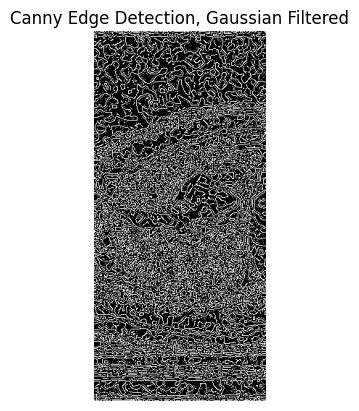

In [12]:
img_gaussian_filter = gaussian_filter(img_gaussian_noise, sigma=3)
display_canny(img_gaussian_filter, y=215, title="Canny Edge Detection, Gaussian Filtered")